In [1]:
import os
import sys

import numpy as np
import torch

sys.path.append(os.path.join(os.path.dirname("__file__"), ".."))

## Dataset

In [2]:
from modules.data import get_data

dataset = get_data("Cora") # no attack get_data("Cora", "n:10")
dataset

Cora()

In [3]:
for y_val in dataset[0].y.unique():
    print(y_val, sum(dataset[0].y == y_val) / dataset[0].y.shape[0])

tensor(0) tensor(0.1296)
tensor(1) tensor(0.0801)
tensor(2) tensor(0.1544)
tensor(3) tensor(0.3021)
tensor(4) tensor(0.1573)
tensor(5) tensor(0.1100)
tensor(6) tensor(0.0665)


## Training

In [4]:
from models.gat import GIBGAT
from models.gcn import GIBGCN

from modules.train import train_node_level

def print_results(result_dict):
    if "train" in result_dict:
        print("Train accuracy: %4.2f%%" % (100.0 * result_dict["train"]))
    if "val" in result_dict:
        print("Val accuracy:   %4.2f%%" % (100.0 * result_dict["val"]))
    print("Test accuracy:  %4.2f%%" % (100.0 * result_dict["test"]))
    
class Config(dict):
    def __init__(self, *args, **kwargs):
        super(Config, self).__init__(*args, **kwargs)
        self.__dict__ = self

## GAT-DNsampling

In [5]:
conf_GIBGAT = Config(
    exp_name="GIBGAT_CORA-DNsampling",
    model=GIBGAT(dataset.num_features, dataset.num_classes, latent_size=8, struct_dropout_mode = ("DNsampling",'multi-categorical-sum',1,3,2)),
    model_name="GIB-GAT-DNsampling",
    struct_dropout_mode = ("DNsampling",'multi-categorical-sum',1,3,2),
    dataset_name="Cora",
    lr=0.03,
    weight_decay=5e-4,
    beta1=0.001,
    beta2=0.01,
    CHECKPOINT_PATH="../saved_models",
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu"),
    loss_type=dataset.loss,
)
conf_GIBGAT

{'exp_name': 'GIBGAT_CORA-DNsampling',
 'model': GIBGAT(
   (conv1): GATConv(1433, 8, heads=1)
   (conv2): GATConv(8, 7, heads=1)
 ),
 'model_name': 'GIB-GAT-DNsampling',
 'struct_dropout_mode': ('DNsampling', 'multi-categorical-sum', 1, 3, 2),
 'dataset_name': 'Cora',
 'lr': 0.03,
 'weight_decay': 0.0005,
 'beta1': 0.001,
 'beta2': 0.01,
 'CHECKPOINT_PATH': '../saved_models',
 'device': device(type='cuda'),
 'loss_type': 'softmax'}

In [6]:
trainer, train_out_dict, val_out_dict, pl_model, result, test_result = train_node_level(
    conf_GIBGAT,
    dataset,
)

print_results(result)

Global seed set to 42
wandb: Currently logged in as: stepp1. Use `wandb login --relogin` to force relogin


/home/step/.miniconda3/envs/gib/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/callback_connector.py:96: LightningDeprecationWarning: Setting `Trainer(progress_bar_refresh_rate=1)` is deprecated in v1.5 and will be removed in v1.7. Please pass `pytorch_lightning.callbacks.progress.TQDMProgressBar` with `refresh_rate` directly to the Trainer's `callbacks` argument instead. Or, to disable the progress bar pass `enable_progress_bar = False` to the Trainer.
  rank_zero_deprecation(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Global seed set to 42
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type   | Params
---------------------------------
0 | model | GIBGAT | 11.6 K
---------------------------------
11.6 K    Trainable params
0         Non-trainable params
11.6 K    Total params
0.046     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/home/step/.miniconda3/envs/gib/lib/python3.9/site-packages/pytorch_lightning/utilities/data.py:72: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2708. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(
/home/step/.miniconda3/envs/gib/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1933: PossibleUserWarning: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

Train accuracy: 98.57%
Val accuracy:   67.40%
Test accuracy:  78.10%


/tmp/ipykernel_1523857/1771400309.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  plot_tsne(F.softmax(val_out_dict["latent_out"][1]).detach(), y_colors, f_suffix=conf_GIBGAT.model_name, pca=False)
/home/step/.miniconda3/envs/gib/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/step/.miniconda3/envs/gib/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/step/.miniconda3/envs/gib/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

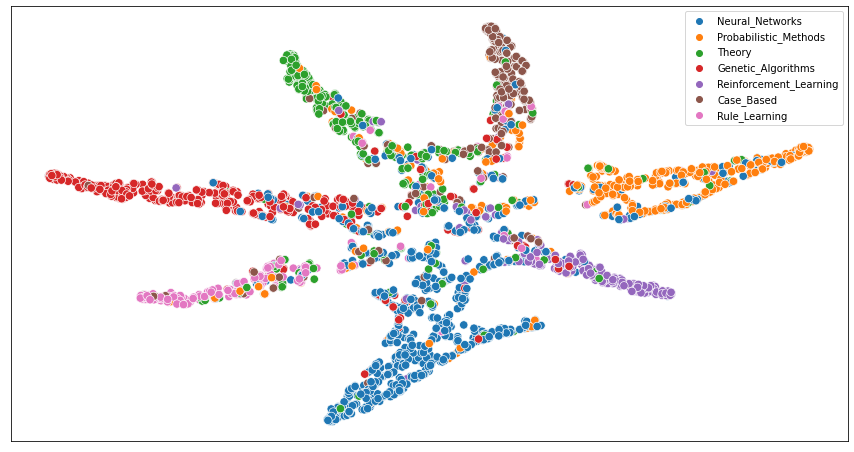

In [7]:
from visualization import *
from torch.nn import functional as F

class_mapping = {
    0: "Theory",
    1:"Reinforcement_Learning",
    2:"Genetic_Algorithms",
    3:"Neural_Networks" ,
    4:"Probabilistic_Methods",
    5:"Case_Based" ,
    6:"Rule_Learning"
}

y_colors = [f"{class_mapping[item]}" for item in dataset[0].y.tolist()]


plot_tsne(F.softmax(val_out_dict["latent_out"][1]).detach(), y_colors, f_suffix=conf_GIBGAT.model_name, pca=False)